# Class project

### 2. By using the same data in 1, compress Pokemon image data using Autoencoder.
cr. https://colab.research.google.com/drive/12_v73VGIML5Im7D3cXqiJIeD33Z0DJtD


In [1]:
import os, sys

pokemon_y = []
fullpath = []
path = "pokemonclassification/PokemonData"
dirs = os.listdir( path )
for files in dirs:
    pokemon_y.append(files)
    files_path = path + "/" + files
    file = os.listdir( files_path )
    img_path = []
    for img in file:
        img_path.append(files_path + "/" + img )
    fullpath.append(img_path) 


# pokemon_y : Keeping the Pokemon name in array
# fullpath  : The path to the each Pokemon image

# print(pokemon_y)
# print(len(pokemon_y))
# print(fullpath)

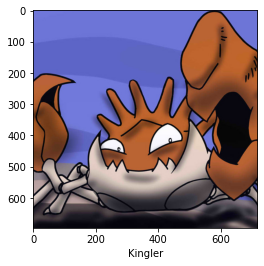

(696, 718, 3)


In [75]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread(fullpath[1][0]).astype('float32') / 255
plt.imshow(img, cmap = 'gray')
plt.xlabel(pokemon_y[1])
plt.show()
print(img.shape)

In [3]:
#for check

# pokemon_x = []
# for i in range(0,len(fullpath)):
#     print('{} : {} : {}'.format(i, pokemon_y[i], len(fullpath[i]) ))
#     for pokemon in fullpath[i]:
#         pokemon_x.append(cv2.cvtColor(mpimg.imread(pokemon), cv2.COLOR_BGR2GRAY))
#     pokemon_x = []

In [76]:
# get an input

import cv2
pokemon_x = []
for i in range(0,len(fullpath)):
#     for pokemon in fullpath[i]:
        try:
            # pokemon_x.append(cv2.cvtColor(mpimg.imread(pokemon), cv2.COLOR_BGR2GRAY))
            # convert the image to gray scale : using cvtColor function' -> [0,255]

            pokemon_x.append( cv2.resize( mpimg.imread(fullpath[i][0]).astype('float32') / 255 , (512,512)) )
            # resize image : using cv2.resize -> 512,512
        except:
            pass
    
print(pokemon_x[0].shape) 
print(pokemon_x[140].shape)

(512, 512, 3)
(512, 512, 3)


the number of pokemon : 150


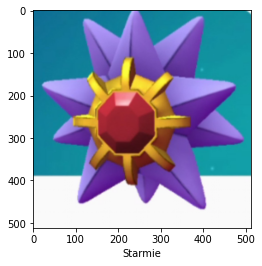

512
512


In [77]:
print('the number of pokemon : {}'.format(len(pokemon_x) ))

plt.imshow(pokemon_x[0], cmap = 'gray')
plt.xlabel(pokemon_y[0])
plt.show()

print(len(pokemon_x[0][0]))
print(len(pokemon_x[0]))

In [65]:
# using Keras
import tensorflow as tf
import tensorflow.keras.layers
import tensorflow.keras.models

inputs = tf.keras.Input(shape=(512,512,))
encoder = tf.keras.layers.Dense(256, activation=tf.nn.relu)(inputs)
compressed_data = tf.keras.layers.Dense(128, activation=tf.nn.relu)
decoder = tf.keras.layers.Dense(256, activation=tf.nn.relu)(encoder)
outputs = tf.keras.layers.Dense(512, activation=tf.nn.relu)(decoder)

autoencoder = tf.keras.Model(inputs, outputs)

In [90]:
autoencoder.compile(optimizer = tf.keras.optimizers.SGD()
                    , loss = tf.keras.losses.MeanSquaredError())

Instructions for updating:
Use tf.cast instead.


In [ ]:
# model.fit(pokemon_x,pokemon_x, epochs = 200, verbose = 0)

In [ ]:
# z = model.predict(X)
# print(z)

# print(encoder(x))